# Importing relevant Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

# Exercise 1: Data Preparation and Preprocessing

In [14]:
DEMO_D=pd.read_csv("D:/deva/SparkCognition_DS Challenge_vBS/DEMO_D.csv")
DEMO_D.head(2)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,NaN
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,4.0,NaN,1.0


In [15]:
BPX_D=pd.read_csv("D:/deva/SparkCognition_DS Challenge_vBS/BPX_D.csv")
BPX_D.head(2)

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A
0,31127.0,1.0,41.0,NaN,100.0,NaN
1,31128.0,1.0,401.0,NaN,NaN,2.0


In [16]:
TCHOL_D=pd.read_csv("D:/deva/SparkCognition_DS Challenge_vBS/TCHOL_D.csv")
TCHOL_D.head(2)

,SEQN,LBXTC,LBDTCSI
0,31128.0,129.0,3.34
1,31129.0,170.0,4.40


In [17]:
DEMO_D.shape,BPX_D.shape,TCHOL_D.shape

((10348, 11), (9950, 6), (8086, 3))

# Merging all the 3 datasets:

In [18]:
data=pd.merge(DEMO_D,BPX_D,on="SEQN",how="outer")
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,NaN,1.0,41.0,NaN,100.0,NaN
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0
2,31129.0,4.0,2.0,1.0,189.0,190.0,1.500000e+01,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0
3,31130.0,4.0,2.0,2.0,NaN,NaN,8.500000e+01,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0
4,31131.0,4.0,2.0,2.0,535.0,536.0,4.400000e+01,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0


In [19]:
data=pd.merge(data,TCHOL_D,on="SEQN",how="outer")
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,NaN,1.0,41.0,NaN,100.0,NaN,NaN,NaN
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34
2,31129.0,4.0,2.0,1.0,189.0,190.0,1.500000e+01,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40
3,31130.0,4.0,2.0,2.0,NaN,NaN,8.500000e+01,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN
4,31131.0,4.0,2.0,2.0,535.0,536.0,4.400000e+01,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10348 entries, 0 to 10347
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10348 non-null  float64
 1   SDDSRVYR  10348 non-null  float64
 2   RIDSTATR  10348 non-null  float64
 3   RIAGENDR  10348 non-null  float64
 4   RIDAGEMN  10178 non-null  float64
 5   RIDAGEEX  9777 non-null   float64
 6   RIDAGEYR  10348 non-null  float64
 7   RIDRETH1  10348 non-null  float64
 8   DMDEDUC3  3432 non-null   float64
 9   DMDEDUC2  4979 non-null   float64
 10  DMDSCHOL  3184 non-null   float64
 11  PEASCST1  9950 non-null   float64
 12  PEASCTM1  9641 non-null   float64
 13  PEASCCT1  438 non-null    float64
 14  BPXCHR    2168 non-null   float64
 15  BPQ150A   7455 non-null   float64
 16  LBXTC     7360 non-null   float64
 17  LBDTCSI   7360 non-null   float64
dtypes: float64(18)
memory usage: 1.5 MB


In [22]:
data.isnull().sum()

SEQN           0
SDDSRVYR       0
RIDSTATR       0
RIAGENDR       0
RIDAGEMN     170
RIDAGEEX     571
RIDAGEYR       0
RIDRETH1       0
DMDEDUC3    6916
DMDEDUC2    5369
DMDSCHOL    7164
PEASCST1     398
PEASCTM1     707
PEASCCT1    9910
BPXCHR      8180
BPQ150A     2893
LBXTC       2988
LBDTCSI     2988
dtype: int64

# Creating a new features AGE_AT_SCREENING & AGE_AT_EXAM:

In [23]:
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,NaN,1.0,41.0,NaN,100.0,NaN,NaN,NaN
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34
2,31129.0,4.0,2.0,1.0,189.0,190.0,1.500000e+01,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40
3,31130.0,4.0,2.0,2.0,NaN,NaN,8.500000e+01,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN
4,31131.0,4.0,2.0,2.0,535.0,536.0,4.400000e+01,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72


In [24]:
data["RIDAGEMN"].mean()

329.9380035370407

# Here I used a statistical method (MEAN) to fill the NA values.
Reason:As these are continuous columns the above method is the best method.

In [25]:
data["AGE_AT_SCREENING"]=data["RIDAGEMN"].fillna(330)

In [26]:
data["RIDAGEEX"].mean()

330.41382837271146

In [27]:
data["AGE_AT_EXAM"]=data["RIDAGEEX"].fillna(330)

In [28]:
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,NaN,1.0,41.0,NaN,100.0,NaN,NaN,NaN,11.0,12.0
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,132.0
2,31129.0,4.0,2.0,1.0,189.0,190.0,1.500000e+01,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,189.0,190.0
3,31130.0,4.0,2.0,2.0,NaN,NaN,8.500000e+01,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,330.0,330.0
4,31131.0,4.0,2.0,2.0,535.0,536.0,4.400000e+01,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,535.0,536.0


# Creating new categorical feature HIGHEST_EDUCATION with the following categories: ELEMENTARY,HIGHSCHOOL and COLLEGE:

In [29]:
data["DMDEDUC3"]=data["DMDEDUC3"].replace({1:"ELEMENTARY",2:"ELEMENTARY",3:"ELEMENTARY",4:"ELEMENTARY",5:"ELEMENTARY",6:"ELEMENTARY",7:"ELEMENTARY",8:"ELEMENTARY",9:"ELEMENTARY",10:"ELEMENTARY",11:"ELEMENTARY",12:"ELEMENTARY",13:"HIGHSCHOOL",14:"HIGHSCHOOL",15:"HIGHSCHOOL",66:"ELEMENTARY",99:"ELEMENTARY"})

In [30]:
data["DMDEDUC2"]=data["DMDEDUC2"].replace({1:"ELEMENTARY",2:"ELEMENTARY",3:"HIGHSCHOOL",4:"COLLEGE",5:"COLLEGE",7:"ELEMENTARY",9:"ELEMENTARY"})

In [31]:
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,NaN,1.0,41.0,NaN,100.0,NaN,NaN,NaN,11.0,12.0
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,ELEMENTARY,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,132.0
2,31129.0,4.0,2.0,1.0,189.0,190.0,1.500000e+01,4.0,ELEMENTARY,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,189.0,190.0
3,31130.0,4.0,2.0,2.0,NaN,NaN,8.500000e+01,3.0,NaN,COLLEGE,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,330.0,330.0
4,31131.0,4.0,2.0,2.0,535.0,536.0,4.400000e+01,4.0,NaN,COLLEGE,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,535.0,536.0


In [32]:
data["HIGHEST_EDUCATION"]=data["DMDEDUC3"].fillna(data["DMDEDUC2"])

In [33]:
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,...,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,HIGHEST_EDUCATION
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,...,1.0,41.0,NaN,100.0,NaN,NaN,NaN,11.0,12.0,NaN
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,ELEMENTARY,NaN,...,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,132.0,ELEMENTARY
2,31129.0,4.0,2.0,1.0,189.0,190.0,1.500000e+01,4.0,ELEMENTARY,NaN,...,1.0,664.0,NaN,NaN,1.0,170.0,4.40,189.0,190.0,ELEMENTARY
3,31130.0,4.0,2.0,2.0,NaN,NaN,8.500000e+01,3.0,NaN,COLLEGE,...,2.0,NaN,4.0,NaN,2.0,NaN,NaN,330.0,330.0,COLLEGE
4,31131.0,4.0,2.0,2.0,535.0,536.0,4.400000e+01,4.0,NaN,COLLEGE,...,1.0,827.0,NaN,NaN,2.0,105.0,2.72,535.0,536.0,COLLEGE


# Dropping the columns which are replaced with new features:

In [34]:
data=data.drop(["DMDEDUC3","DMDEDUC2","RIDAGEMN","RIDAGEEX","DMDSCHOL"],1)
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,HIGHEST_EDUCATION
0,31127.0,4.0,2.0,1.0,5.397605e-79,3.0,1.0,41.0,NaN,100.0,NaN,NaN,NaN,11.0,12.0,NaN
1,31128.0,4.0,2.0,2.0,1.100000e+01,4.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,132.0,ELEMENTARY
2,31129.0,4.0,2.0,1.0,1.500000e+01,4.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,189.0,190.0,ELEMENTARY
3,31130.0,4.0,2.0,2.0,8.500000e+01,3.0,2.0,NaN,4.0,NaN,2.0,NaN,NaN,330.0,330.0,COLLEGE
4,31131.0,4.0,2.0,2.0,4.400000e+01,4.0,1.0,827.0,NaN,NaN,2.0,105.0,2.72,535.0,536.0,COLLEGE


In [35]:
data["HIGHEST_EDUCATION"].value_counts()

ELEMENTARY               4224
COLLEGE                  2395
HIGHSCHOOL               1548
5.397605346934027e-79     244
Name: HIGHEST_EDUCATION, dtype: int64

In [36]:
data["HIGHEST_EDUCATION"]=data["HIGHEST_EDUCATION"].replace({5.397605346934027e-79:"ELEMENTARY"})

In [37]:
data["HIGHEST_EDUCATION"].value_counts()

ELEMENTARY    4468
COLLEGE       2395
HIGHSCHOOL    1548
Name: HIGHEST_EDUCATION, dtype: int64

# To fill the NA values for HIGHEST_EDUCATION feature i used KNN imputation method:
Reason: This imputer utilizes the k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter 'n_neighbors' nearest neighbors found in the training set. By default, it uses a Euclidean distance metric to impute the missing values

In [38]:
data["HIGHEST_EDUCATION"]=data["HIGHEST_EDUCATION"].map({"ELEMENTARY":0,"COLLEGE":1,"HIGHSCHOOL":2})
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,HIGHEST_EDUCATION
0,31127.0,4.0,2.0,1.0,5.397605e-79,3.0,1.0,41.0,NaN,100.0,NaN,NaN,NaN,11.0,12.0,NaN
1,31128.0,4.0,2.0,2.0,1.100000e+01,4.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,132.0,0.0
2,31129.0,4.0,2.0,1.0,1.500000e+01,4.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,189.0,190.0,0.0
3,31130.0,4.0,2.0,2.0,8.500000e+01,3.0,2.0,NaN,4.0,NaN,2.0,NaN,NaN,330.0,330.0,1.0
4,31131.0,4.0,2.0,2.0,4.400000e+01,4.0,1.0,827.0,NaN,NaN,2.0,105.0,2.72,535.0,536.0,1.0


In [39]:
from sklearn.impute import KNNImputer

In [40]:
Na=KNNImputer()
mm=Na.fit_transform(data)

In [41]:
mm=pd.DataFrame(mm)
mm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,31127.0,4.0,2.0,1.0,5.397605e-79,3.0,1.0,41.0,51.4,100.0,2.0,164.0,4.240,11.0,12.0,0.0
1,31128.0,4.0,2.0,2.0,1.100000e+01,4.0,1.0,401.0,32.4,99.2,2.0,129.0,3.340,132.0,132.0,0.0
2,31129.0,4.0,2.0,1.0,1.500000e+01,4.0,1.0,664.0,43.2,81.2,1.0,170.0,4.400,189.0,190.0,0.0
3,31130.0,4.0,2.0,2.0,8.500000e+01,3.0,2.0,648.2,4.0,81.2,2.0,172.8,4.468,330.0,330.0,1.0
4,31131.0,4.0,2.0,2.0,4.400000e+01,4.0,1.0,827.0,54.2,98.8,2.0,105.0,2.720,535.0,536.0,1.0


In [42]:
HIGHEST_EDUCATION=mm[15]
HIGHEST_EDUCATION.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: 15, dtype: float64

In [43]:
data=data.drop(["HIGHEST_EDUCATION"],1)
data=pd.concat([data,HIGHEST_EDUCATION],1)
data=data.rename(columns={15:"HIGHEST_EDUCATION"},inplace=False)
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,HIGHEST_EDUCATION
0,31127.0,4.0,2.0,1.0,5.397605e-79,3.0,1.0,41.0,NaN,100.0,NaN,NaN,NaN,11.0,12.0,0.0
1,31128.0,4.0,2.0,2.0,1.100000e+01,4.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,132.0,0.0
2,31129.0,4.0,2.0,1.0,1.500000e+01,4.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,189.0,190.0,0.0
3,31130.0,4.0,2.0,2.0,8.500000e+01,3.0,2.0,NaN,4.0,NaN,2.0,NaN,NaN,330.0,330.0,1.0
4,31131.0,4.0,2.0,2.0,4.400000e+01,4.0,1.0,827.0,NaN,NaN,2.0,105.0,2.72,535.0,536.0,1.0


In [44]:
na=mm[[6,7,10,11,12]]
data=data.drop(["PEASCST1","PEASCTM1","BPQ150A","LBXTC","LBDTCSI"],1)
data=pd.concat([data,na],1)
data=data.rename(columns={6:"PEASCST1",7:"PEASCTM1",10:"BPQ150A",11:"LBXTC",12:"LBDTCSI"},inplace=False)
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,PEASCCT1,BPXCHR,AGE_AT_SCREENING,AGE_AT_EXAM,HIGHEST_EDUCATION,PEASCST1,PEASCTM1,BPQ150A,LBXTC,LBDTCSI
0,31127.0,4.0,2.0,1.0,5.397605e-79,3.0,NaN,100.0,11.0,12.0,0.0,1.0,41.0,2.0,164.0,4.240
1,31128.0,4.0,2.0,2.0,1.100000e+01,4.0,NaN,NaN,132.0,132.0,0.0,1.0,401.0,2.0,129.0,3.340
2,31129.0,4.0,2.0,1.0,1.500000e+01,4.0,NaN,NaN,189.0,190.0,0.0,1.0,664.0,1.0,170.0,4.400
3,31130.0,4.0,2.0,2.0,8.500000e+01,3.0,4.0,NaN,330.0,330.0,1.0,2.0,648.2,2.0,172.8,4.468
4,31131.0,4.0,2.0,2.0,4.400000e+01,4.0,NaN,NaN,535.0,536.0,1.0,1.0,827.0,2.0,105.0,2.720


In [45]:
data.isnull().sum()

SEQN                    0
SDDSRVYR                0
RIDSTATR                0
RIAGENDR                0
RIDAGEYR                0
RIDRETH1                0
PEASCCT1             9910
BPXCHR               8180
AGE_AT_SCREENING        0
AGE_AT_EXAM             0
HIGHEST_EDUCATION       0
PEASCST1                0
PEASCTM1                0
BPQ150A                 0
LBXTC                   0
LBDTCSI                 0
dtype: int64

# These features has huge missing values so instead of filling the NA values, better to drop the columns:

In [46]:
data=data.drop(["PEASCCT1","BPXCHR"],1)
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,AGE_AT_SCREENING,AGE_AT_EXAM,HIGHEST_EDUCATION,PEASCST1,PEASCTM1,BPQ150A,LBXTC,LBDTCSI
0,31127.0,4.0,2.0,1.0,5.397605e-79,3.0,11.0,12.0,0.0,1.0,41.0,2.0,164.0,4.240
1,31128.0,4.0,2.0,2.0,1.100000e+01,4.0,132.0,132.0,0.0,1.0,401.0,2.0,129.0,3.340
2,31129.0,4.0,2.0,1.0,1.500000e+01,4.0,189.0,190.0,0.0,1.0,664.0,1.0,170.0,4.400
3,31130.0,4.0,2.0,2.0,8.500000e+01,3.0,330.0,330.0,1.0,2.0,648.2,2.0,172.8,4.468
4,31131.0,4.0,2.0,2.0,4.400000e+01,4.0,535.0,536.0,1.0,1.0,827.0,2.0,105.0,2.720


In [48]:
 data.isnull().sum()

SEQN                 0
SDDSRVYR             0
RIDSTATR             0
RIAGENDR             0
RIDAGEYR             0
RIDRETH1             0
AGE_AT_SCREENING     0
AGE_AT_EXAM          0
HIGHEST_EDUCATION    0
PEASCST1             0
PEASCTM1             0
BPQ150A              0
LBXTC                0
LBDTCSI              0
dtype: int64

# Loading the DEMO_RETIRED dataset:

In [49]:
DEMO_RETIRED=pd.read_csv("D:/deva/SparkCognition_DS Challenge_vBS/DEMO_RETIRED.csv")
DEMO_RETIRED.head(2)

,SEQN,RETIRED
0,31127.0,NaN
1,31128.0,0.0


In [50]:
DEMO_RETIRED.isnull().sum()

SEQN          0
RETIRED    2262
dtype: int64

In [179]:
DEMO_RETIRED["RETIRED"].mode()

0    0.0
dtype: float64

In [180]:
DEMO_RETIRED["RETIRED"]=DEMO_RETIRED["RETIRED"].fillna(0)

# RETIRED feature is a classification variable so i will suggest MODE method to fill the NA values.

# Merging the datasets:

In [51]:
data=pd.merge(data,DEMO_RETIRED,on="SEQN")
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,AGE_AT_SCREENING,AGE_AT_EXAM,HIGHEST_EDUCATION,PEASCST1,PEASCTM1,BPQ150A,LBXTC,LBDTCSI,RETIRED
0,31127.0,4.0,2.0,1.0,5.397605e-79,3.0,11.0,12.0,0.0,1.0,41.0,2.0,164.0,4.240,NaN
1,31128.0,4.0,2.0,2.0,1.100000e+01,4.0,132.0,132.0,0.0,1.0,401.0,2.0,129.0,3.340,0.0
2,31129.0,4.0,2.0,1.0,1.500000e+01,4.0,189.0,190.0,0.0,1.0,664.0,1.0,170.0,4.400,0.0
3,31130.0,4.0,2.0,2.0,8.500000e+01,3.0,330.0,330.0,1.0,2.0,648.2,2.0,172.8,4.468,1.0
4,31131.0,4.0,2.0,2.0,4.400000e+01,4.0,535.0,536.0,1.0,1.0,827.0,2.0,105.0,2.720,0.0


In [52]:
Na=KNNImputer()
impute=Na.fit_transform(data)
impute=pd.DataFrame(impute)
impute.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,31127.0,4.0,2.0,1.0,5.397605e-79,3.0,11.0,12.0,0.0,1.0,41.0,2.0,164.0,4.240,0.0
1,31128.0,4.0,2.0,2.0,1.100000e+01,4.0,132.0,132.0,0.0,1.0,401.0,2.0,129.0,3.340,0.0
2,31129.0,4.0,2.0,1.0,1.500000e+01,4.0,189.0,190.0,0.0,1.0,664.0,1.0,170.0,4.400,0.0
3,31130.0,4.0,2.0,2.0,8.500000e+01,3.0,330.0,330.0,1.0,2.0,648.2,2.0,172.8,4.468,1.0
4,31131.0,4.0,2.0,2.0,4.400000e+01,4.0,535.0,536.0,1.0,1.0,827.0,2.0,105.0,2.720,0.0


In [53]:
na1=impute[14]
data=data.drop(["RETIRED"],1)
data=pd.concat([data,na1],1)
data=data.rename(columns={14:"RETIRED"},inplace=False)
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,AGE_AT_SCREENING,AGE_AT_EXAM,HIGHEST_EDUCATION,PEASCST1,PEASCTM1,BPQ150A,LBXTC,LBDTCSI,RETIRED
0,31127.0,4.0,2.0,1.0,5.397605e-79,3.0,11.0,12.0,0.0,1.0,41.0,2.0,164.0,4.240,0.0
1,31128.0,4.0,2.0,2.0,1.100000e+01,4.0,132.0,132.0,0.0,1.0,401.0,2.0,129.0,3.340,0.0
2,31129.0,4.0,2.0,1.0,1.500000e+01,4.0,189.0,190.0,0.0,1.0,664.0,1.0,170.0,4.400,0.0
3,31130.0,4.0,2.0,2.0,8.500000e+01,3.0,330.0,330.0,1.0,2.0,648.2,2.0,172.8,4.468,1.0
4,31131.0,4.0,2.0,2.0,4.400000e+01,4.0,535.0,536.0,1.0,1.0,827.0,2.0,105.0,2.720,0.0


# After merging the datasets I suggest KNN imputation method to fill the NA values.

In [54]:
data.isnull().sum()

SEQN                 0
SDDSRVYR             0
RIDSTATR             0
RIAGENDR             0
RIDAGEYR             0
RIDRETH1             0
AGE_AT_SCREENING     0
AGE_AT_EXAM          0
HIGHEST_EDUCATION    0
PEASCST1             0
PEASCTM1             0
BPQ150A              0
LBXTC                0
LBDTCSI              0
RETIRED              0
dtype: int64

# Exercise 2: Model Building

In [55]:
CLAIM_DATA=pd.read_csv("D:/deva/SparkCognition_DS Challenge_vBS/claim_prediction.csv")
CLAIM_DATA.head()

,EADDC,EAFXA,FDDBC,AFDDA,AXCXA,EXCCE,FBXFC,DFFEC,CEXAE,BBADX,CLAIM
0,-0.193513,0.021062,-0.870351,4.314903,-4.260162,-1.259531,0.175603,-0.942903,2.333260,4.678712,0
1,2.667844,-3.195978,2.718651,-0.885312,2.964261,2.161336,2.008505,-0.296360,-0.610780,-2.545978,1
2,2.280602,0.048539,-2.179863,-0.380866,-1.212960,2.097278,5.131315,-1.250050,2.362880,2.207307,0
3,0.592376,-1.590548,2.329976,-1.416489,1.743390,3.040990,2.371740,-0.190549,0.890761,-2.671923,0
4,1.236896,-0.656180,-0.381064,-2.332379,0.660684,2.055621,0.478162,-0.269513,2.614886,-3.655301,0


In [56]:
x=CLAIM_DATA.drop(["CLAIM"],1)
y=CLAIM_DATA["CLAIM"]

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

# LogisticRegression

In [58]:
Machine=LogisticRegression()
Machine.fit(x_train,y_train)

LogisticRegression()

In [59]:
Pred=Machine.predict(x_test)

In [60]:
Comparison=pd.DataFrame({"Actual":y_test,"Estimated":Pred})
Comparison.head()

,Actual,Estimated
6252,0,0
4684,0,0
1731,1,1
4742,1,1
4521,1,0


In [61]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy_score(y_test,Pred)*100

82.42424242424242

In [62]:
confusion_matrix(y_test,Pred)

array([[1372,  284],
       [ 296, 1348]], dtype=int64)

In [63]:
print(classification_report(y_test,Pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1656
           1       0.83      0.82      0.82      1644

    accuracy                           0.82      3300
   macro avg       0.82      0.82      0.82      3300
weighted avg       0.82      0.82      0.82      3300



# KNeighborsClassifier:

In [64]:
k=np.arange(1,25)
train_accuracy=np.empty(len(k))
test_accuracy=np.empty(len(k))
for i,k in enumerate(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i]=knn.score(x_train,y_train)
    test_accuracy[i]=knn.score(x_test,y_test)
    print(train_accuracy[i])
    print(test_accuracy[i])

1.0
0.803030303030303
0.8971641791044777
0.8051515151515152
0.9029850746268657
0.8584848484848485
0.894179104477612
0.860909090909091
0.8926865671641792
0.8803030303030303
0.8902985074626866
0.8796969696969696
0.8897014925373135
0.8878787878787879
0.888955223880597
0.886969696969697
0.8877611940298508
0.8887878787878788
0.8877611940298508
0.8903030303030303
0.8876119402985074
0.8909090909090909
0.8868656716417911
0.8903030303030303
0.8865671641791045
0.8912121212121212
0.8865671641791045
0.8909090909090909
0.8868656716417911
0.8909090909090909
0.8862686567164179
0.8903030303030303
0.8862686567164179
0.8903030303030303
0.8868656716417911
0.8903030303030303
0.8862686567164179
0.89
0.8861194029850746
0.8893939393939394
0.8861194029850746
0.89
0.8853731343283582
0.89
0.8859701492537313
0.89
0.8855223880597015
0.8893939393939394


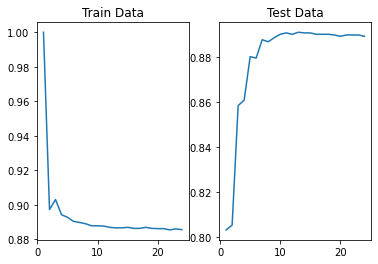

In [65]:
k=np.arange(1,25)
plt.subplot(121)
plt.title("Train Data")
plt.plot(k,train_accuracy)
plt.subplot(122)
plt.title("Test Data")
plt.plot(k,test_accuracy)

In [66]:
modc=np.where(test_accuracy==max(test_accuracy))
modc

(array([12], dtype=int64),)

In [67]:
Model=KNeighborsClassifier(n_neighbors=12)
Model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [68]:
Model.score(x_test,y_test)*100

89.03030303030303

In [69]:
Model.score(x_train,y_train)*100

88.68656716417911

In [70]:
x.shape

(10000, 10)

# Let's try with ANN algorithm:

In [71]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation

In [79]:
Machine=Sequential()
Machine.add(Dense(132,input_dim=10,activation="sigmoid"))
Machine.add(Dense(64,activation="relu"))
Machine.add(Dense(32,activation="relu"))
Machine.add(Dense(1,activation="sigmoid"))
Machine.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [80]:
Machine.fit(x,y,epochs=100,verbose=2)

Epoch 1/100
313/313 - 0s - loss: 0.4366 - accuracy: 0.8341
Epoch 2/100
313/313 - 0s - loss: 0.3854 - accuracy: 0.8703
Epoch 3/100
313/313 - 0s - loss: 0.3761 - accuracy: 0.8747
Epoch 4/100
313/313 - 0s - loss: 0.3711 - accuracy: 0.8786
Epoch 5/100
313/313 - 0s - loss: 0.3666 - accuracy: 0.8776
Epoch 6/100
313/313 - 0s - loss: 0.3653 - accuracy: 0.8789
Epoch 7/100
313/313 - 0s - loss: 0.3618 - accuracy: 0.8809
Epoch 8/100
313/313 - 0s - loss: 0.3590 - accuracy: 0.8834
Epoch 9/100
313/313 - 0s - loss: 0.3589 - accuracy: 0.8835
Epoch 10/100
313/313 - 0s - loss: 0.3558 - accuracy: 0.8833
Epoch 11/100
313/313 - 0s - loss: 0.3570 - accuracy: 0.8833
Epoch 12/100
313/313 - 0s - loss: 0.3553 - accuracy: 0.8848
Epoch 13/100
313/313 - 0s - loss: 0.3523 - accuracy: 0.8845
Epoch 14/100
313/313 - 0s - loss: 0.3539 - accuracy: 0.8851
Epoch 15/100
313/313 - 0s - loss: 0.3518 - accuracy: 0.8871
Epoch 16/100
313/313 - 0s - loss: 0.3512 - accuracy: 0.8864
Epoch 17/100
313/313 - 0s - loss: 0.3484 - accura

In [81]:
Machine.evaluate(x_test,y_test)

104/104 [==============================] - 0s 617us/step - loss: 0.2546 - accuracy: 0.9055


[0.2546336054801941, 0.9054545164108276]

In [82]:
Prediction=Machine.predict_classes(x_train)
Prediction

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [87]:
accuracy_score(y_train,Prediction)*100

90.28358208955224

In [86]:
confusion_matrix(y_train,Prediction)

array([[3078,  318],
       [ 333, 2971]], dtype=int64)

# Exercise 3: Model Evaluation

1. What is one way to determine the number of clusters in K-Means clustering? How would you
estimate the efficacy, or quality, of the K-means clustering results?

Ans: 
Elbow Method:
This is most popular method to determine the right number of clusters. 

K-Means clustering can be improved by the better initialization technique and the data should not contain the outliers.  


2. Your linear regression model is suffering from low bias and high variance. What steps can you
take to improve your model?

Ans: 1. Ensembling Method,
     2.Train with more data,
     3.Cross-validation method and Regulirization Method.


3. Below is a scenario for training error (TE) and validation error (VE) for several iterations of a
machine learning model. Which model would you choose, and why?

Model TE VE
1 105 90
2 200 85
3 250 96
4 105 85
5 300 100

Ans: Here i will use the Regulirization techniques Ridge Regression and Lasso Regression.

4. You have built a model for a binary classification problem. The trained model was applied to the
validation dataset and produced the results documented in the following confusion matrix.

True Positive:97,
False Positive:48,
False Negative:6,
True Negative:112
Total:263



Q a).Calculate Recall, Precision and F-1 score:

    Ans:*Calculate Recall: 97/97+6=0.94,
        
        *Precision:97/97+48=0.67,
        
        *F-1 score:2*0.67*0.94/0.67+0.94=0.78
        
        
   b).If your classifier model is attempting to predict cancer in patients. Which type of error should you focus on for thi             type of problem? Which evaluation metric would you choose and why?
    
    Ans: There are 2 major error in Classification Model: 1: False Positive and 2.False Negative.
    I will choose Confusion metrix,Precision and recall method. 
    Reason: 
    Confusion metrix: It gives information about errors made by the classifier and the types of errors that are being               made.
    Precision and Recall method: Precision and recall are two extremely important model evaluation metrics.
    
  c).If your classifier model is attempting to determine whether or not to recommend a YouTube video. Which type of error should      you focus on for this type of problem? Which evaluation metric would you choose and why?
    
    Ans:  I will choose ROC method and Precision and recall method.
    Reason:A simple graphical representation of the diagnostic accuracy of a test.
         
         
            

# Exercise 4: Anomaly Detection

In [168]:
anomaly_DF=pd.read_csv("D:/deva/SparkCognition_DS Challenge_vBS/anomaly_detection.csv")
anomaly_DF.head()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
0,0.000000,0.000000,3.000000,3.000000,8.000000
1,1.232260,-0.217305,3.193780,3.489992,7.792553
2,2.540129,0.606709,3.180950,3.464811,7.817440
3,5.520271,1.470812,3.330528,2.968375,7.409152
4,5.914298,2.745060,3.061706,3.440980,7.153049


In [169]:
anomaly_DF.describe()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,9.237768,4.443320,0.641819,4.684912,9.369973
std,4.795601,2.890635,1.844518,1.261149,1.237600
min,0.000000,-1.928240,-4.436065,2.130575,6.809182
25%,5.284511,2.334320,-0.686288,3.718403,8.535509
50%,8.478075,4.014063,0.864738,4.716682,9.413427
75%,12.312325,6.385877,2.161050,5.476941,10.223419
max,20.898647,12.194835,3.775713,8.477024,12.114621


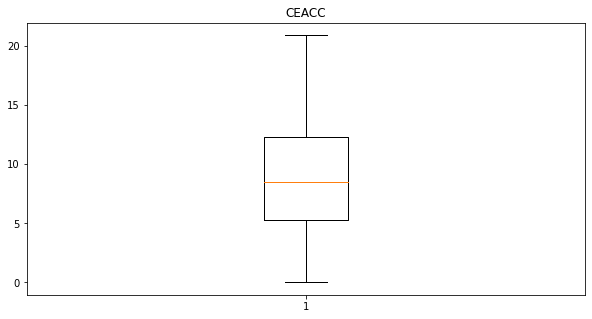

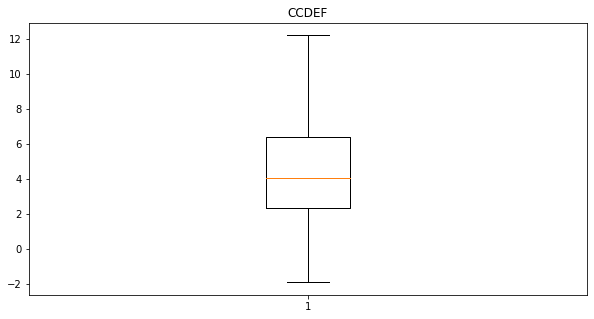

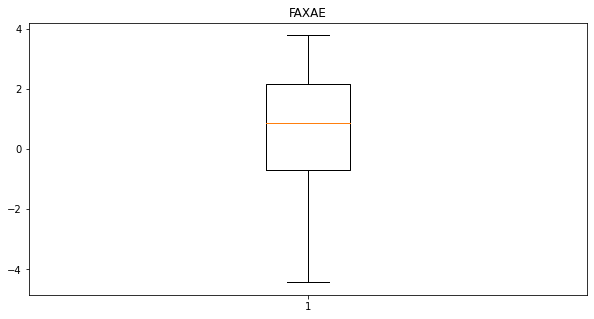

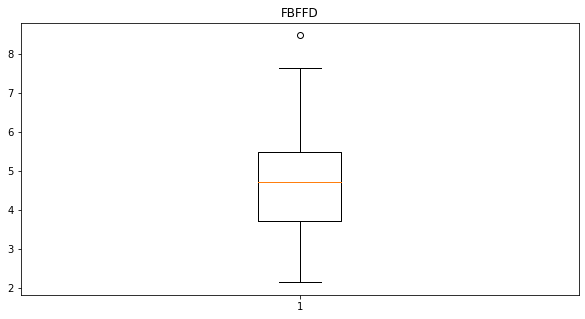

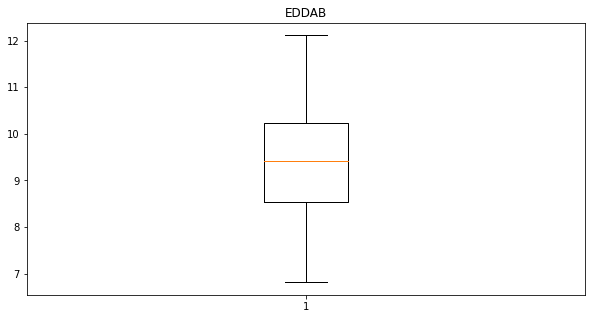

In [170]:
for i in range(len(anomaly_DF.columns)):
    
    
    plt.figure(figsize=(10,5))
    plt.boxplot(anomaly_DF[anomaly_DF.columns[i]])
    plt.title(anomaly_DF[anomaly_DF.columns[i]].name)

In [171]:
outliers=[]
def detect_outlier(data_1):
    threshold=3
    mean1=np.mean(data_1)
    std1=np.std(data_1)
    
    for y in data_1:
        z_score=(y-mean1)/std1
        if np.abs(z_score)>threshold:
            outliers.append(y)
            
            
    return outliers

In [172]:
detect_outlier(anomaly_DF["CEACC"])

[]

In [173]:
detect_outlier(anomaly_DF["CCDEF"])

[]

In [174]:
detect_outlier(anomaly_DF["FAXAE"])

[]

In [175]:
detect_outlier(anomaly_DF["FBFFD"])

[8.477024365928582]

In [176]:
detect_outlier(anomaly_DF["EDDAB"])

[8.477024365928582]

In [147]:
anomaly_9month_DF=anomaly_DF.iloc[0:274]
anomaly_9month_DF.tail(2)

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
272,11.702856,6.147422,0.825552,6.746459,9.643524
273,10.555822,5.669821,0.454363,6.398245,9.293962


In [145]:
anomaly_3month_DF=anomaly_DF.iloc[274:365]
anomaly_3month_DF.tail(2)

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
363,11.585932,-0.710426,-4.046116,6.519041,11.756765
364,11.991952,-0.399588,-4.436065,6.155139,12.052701
